In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/stock_market_june2025.csv')

**pre processing**

In [3]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,01-06-2025,SLH,34.92,34.53,35.22,34.38,2966611,5.738136e+10,29.63,2.85,1.17,39.39,28.44,Industrials
1,01-06-2025,WGB,206.50,208.45,210.51,205.12,1658738,5.274707e+10,13.03,2.73,16.00,227.38,136.79,Energy
2,01-06-2025,ZIN,125.10,124.03,127.40,121.77,10709898,5.596949e+10,29.19,2.64,4.25,138.35,100.69,Healthcare
3,01-06-2025,YPY,260.55,265.28,269.99,256.64,14012358,7.964089e+10,19.92,1.29,13.32,317.57,178.26,Industrials
4,01-06-2025,VKD,182.43,186.89,189.40,179.02,14758143,7.271437e+10,40.18,1.17,4.65,243.54,165.53,Technology


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1762 non-null   object 
 1   Ticker          1762 non-null   object 
 2   Open Price      1762 non-null   float64
 3   Close Price     1762 non-null   float64
 4   High Price      1762 non-null   float64
 5   Low Price       1762 non-null   float64
 6   Volume Traded   1762 non-null   int64  
 7   Market Cap      1762 non-null   float64
 8   PE Ratio        1762 non-null   float64
 9   Dividend Yield  1762 non-null   float64
 10  EPS             1762 non-null   float64
 11  52 Week High    1762 non-null   float64
 12  52 Week Low     1762 non-null   float64
 13  Sector          1762 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 192.8+ KB


In [5]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03,1.762000e+03,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000
mean,157.500443,157.567054,160.423258,154.703956,8.075851e+06,6.520977e+10,23.143859,2.337327,7.663621,189.009381,125.964574
std,82.043046,82.227448,83.626559,80.647073,5.104890e+06,1.467168e+11,7.498239,1.124037,5.202411,99.082291,67.767279
min,15.020000,14.770000,15.120000,14.480000,5.007270e+05,1.290761e+09,8.020000,0.010000,0.470000,17.030000,10.010000
25%,86.592500,87.055000,88.487500,85.380000,4.268123e+06,2.717406e+10,16.997500,1.450000,3.745000,104.687500,66.662500
50%,155.675000,155.675000,158.820000,152.725000,7.911528e+06,5.135322e+10,22.620000,2.330000,6.790000,185.425000,123.040000
75%,227.207500,227.902500,231.627500,223.102500,1.160026e+07,7.623076e+10,28.977500,3.127500,10.350000,271.920000,179.825000
max,434.400000,447.430000,453.860000,431.500000,6.537774e+07,3.481112e+12,44.890000,5.000000,54.100000,571.570000,345.530000


In [8]:
# Handel missing values
df.dropna(inplace=True)

In [9]:
# Encode categorical columns if any
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Define features (X) and target (y)
x = df.drop('High Price', axis=1)
y = df['High Price']

**Train model(multi liner regression)**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train the model
ml = LinearRegression()
ml.fit(x_train, y_train)

# make predictions
y_pred = ml.predict(x_test)

In [16]:
# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

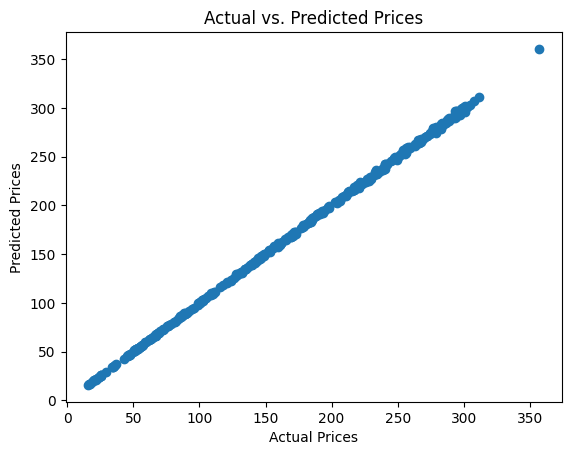

In [17]:
# plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()